<span style="color:orange;font-size:20pt;font-weight:bold">CS412 - Machine Learning - Homework 3 - Berke Ayyıldızlı - 31018</span>

<span style="color:red;font-weight:bold">Required Libraries</span>

In [1]:
import numpy as np #for the calculations
import pandas as pd #to see the dataset better
from sklearn.model_selection import train_test_split # for splitting
from sklearn.preprocessing import StandardScaler # for the scaling
import matplotlib.pyplot as plt # for the better plotting


<span style="font-size:14pt;">Implementing Logistic Regression </span>

In this homework, you are required to implement logistic regression using gradient descent from scratch. The goal is to solidify your understanding of the logistic regression model and the gradient descent optimization algorithm within the context of a binary classification task.
You will use a preprocessed version of the Titanic dataset, which contains data about Titanic passengers. You will predict if a passenger survived or not based on his/her age, sex and passenger class. In the sex column, 1 shows the passenger is female and 2 shows that the passenger is male.


<span style="font-size: 12pt; font-weight: bold;">Q1. Load the dataset and preprocess the data:</span>


• Set your random seed to 42.

• Split the data into training, validation and test sets (60% , 20% , 20% ).

• As the data ranges vary significantly across the feature dimensions, you should scale your features. Scale them linearly within the 0-1 range. Be careful not to include the test data when scaling. You can use StandartScaler for that.

In [2]:
seed = 42 # the random seed that is wanted from us
data = pd.read_csv('titanicdata.csv') #i converted it to a dataframe

train, other = train_test_split(data, test_size=0.4, random_state=seed)  # first i split as 60 percent as train and 40 as other
validation, test = train_test_split(other, test_size=0.5, random_state=seed)  # then i split the other in half, so that we would have the wanted proportions

feature = ['Age', 'Sex', 'Pclass'] # declared the feature and target array to be used later
target = 'Survived'

scaler = StandardScaler()

train_scaled = scaler.fit_transform(train[feature]) # scaled the train, validation and test datas as wanted
validation_scaled = scaler.transform(validation[feature])
test_scaled = scaler.transform(test[feature])

train[feature] = train_scaled # updated our datasets
validation[feature] = validation_scaled
test[feature] = test_scaled

# train, test and validation datasets
X_train = train[feature].values
y_train = train[target].values.reshape(-1, 1)
X_val = validation[feature].values
y_val = validation[target].values.reshape(-1, 1)
X_test = test[feature].values  
y_test = test[target].values.reshape(-1, 1)

print(train.head())

     Survived    Pclass       Sex       Age
570         1 -0.408652  0.737125  2.518697
787         0  0.803682  0.737125 -1.649218
74          1  0.803682  0.737125  0.203189
113         0  0.803682 -1.356623 -0.723015
635         1 -0.408652 -1.356623 -0.105546


<span style="font-size: 12pt; font-weight: bold;">Q2. Implement the logistic regression model:</span>


• Initialize the model parameters w.

• Implement the sigmoid function, σ(z) = features and the model parameters w.
1 , where z is the linear combination of the input 1+e−z

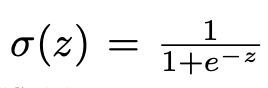

• Implement the cost function,J(w)=−m1 Pmi=1[y(i)log(σ(wTx(i)))+(1−y(i))log(1−σ(wTx(i)))].

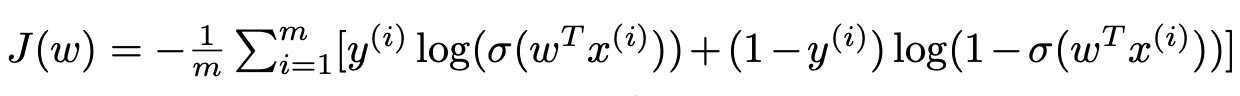

• Implement the gradient descent algorithm to minimize the cost function, updating the parameters
as w := w − α∇wJ(w), where α is the learning rate.

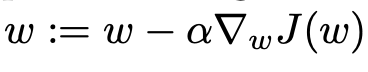


In [3]:
w = np.zeros((X_train.shape[1], 1)) # zero vector for weights, since we have 3 features, dimension is 3
b = 0 # bias is 0

def sigmoid(z): # the wanted sigmoid function
    result = 1 / (1 + np.exp(-z))
    return result

def cost(input, target, weight, bias): #this cost function is for the training, as it is also going to be used to calculate gradients
    
    m = input.shape[0] # number of training samples
    Z = np.dot(input, weight) + bias # calculation of linear combination of features and their addition to bias
    
    A = sigmoid(Z) # we found the predictions
    
    cost = -np.sum(target * np.log(A) + (1 - target) * np.log(1 - A)) / m # the cost function
    
    #now the gradients
    
    dZ = A - target # difference between predictions
    dw = np.dot(input.T, dZ) / m # gradient of weights, gives the average gradient for each feature
    db = np.sum(dZ) / m # gives the effect of the bias
    grads = {"dw": dw, "db": db} # the dictionary for the gradients
    return cost, grads

def compute_cost(input, target, weight, bias): # this is just for the validation
    m = input.shape[0]
    Z = np.dot(input, weight) + bias
    A = sigmoid(Z)
    cost = -np.sum(target * np.log(A) + (1 - target) * np.log(1 - A)) / m
    return cost

def algorithm(X_train, y_train, X_val, y_val, weight, bias, rate, iteration): # the algorithm to minimize the cost function
    training_costs = []
    validation_costs = [] # a list to store the values of our previous function
    
    for i in range(iteration): # runs as we wanted
        training_cost, grads = cost(X_train, y_train, weight, bias)
        validation_cost = compute_cost(X_val, y_val, weight, bias)
        
        dw = grads["dw"]
        db = grads["db"]
        weight -= rate * dw # updates at each iteration
        bias -= rate * db
        
        training_costs.append(training_cost)
        validation_costs.append(validation_cost)
        
    params = {"w": weight, "b": bias}
    grads = {"dw": dw, "db": db}
    
    return training_costs,validation_costs

<span style="font-size: 12pt; font-weight: bold;">Q3. Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation
data. Plot both the training and validation losses across 100 iterations.</span>


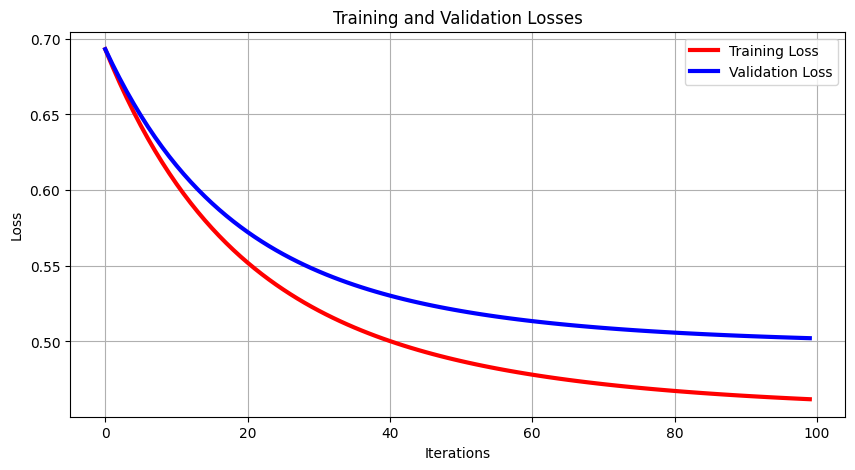

Validation loss is:
0.502144073183423


In [4]:
training_costs, validation_costs = algorithm(X_train, y_train, X_val, y_val, w, b, 0.1, 100) # plugged 0.1 as rate and 100 as iteration amount

plt.figure(figsize=(10, 5))
plt.plot(training_costs, label='Training Loss', color='red',linewidth=3)
plt.plot(validation_costs, label='Validation Loss', color='blue',linewidth=3)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

print("Validation loss is:")
print(validation_costs[-1])

<span style="font-size: 12pt; font-weight: bold;">Q4. Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values of these hyperparameters.</span>


Trained with rate = 0.01, iterations = 100, final validation loss = 0.6175572244024026
Trained with rate = 0.01, iterations = 500, final validation loss = 0.5205994431122453
Trained with rate = 0.01, iterations = 1000, final validation loss = 0.5021164247699182
Trained with rate = 0.01, iterations = 5000, final validation loss = 0.4950183109484026
Trained with rate = 0.05, iterations = 100, final validation loss = 0.5207478742478425
Trained with rate = 0.05, iterations = 500, final validation loss = 0.4962507211626634
Trained with rate = 0.05, iterations = 1000, final validation loss = 0.49501740703858255
Trained with rate = 0.05, iterations = 5000, final validation loss = 0.49479375333526
Trained with rate = 0.1, iterations = 100, final validation loss = 0.502144073183423
Trained with rate = 0.1, iterations = 500, final validation loss = 0.49501626974061
Trained with rate = 0.1, iterations = 1000, final validation loss = 0.4947979018691473
Trained with rate = 0.1, iterations = 5000, f

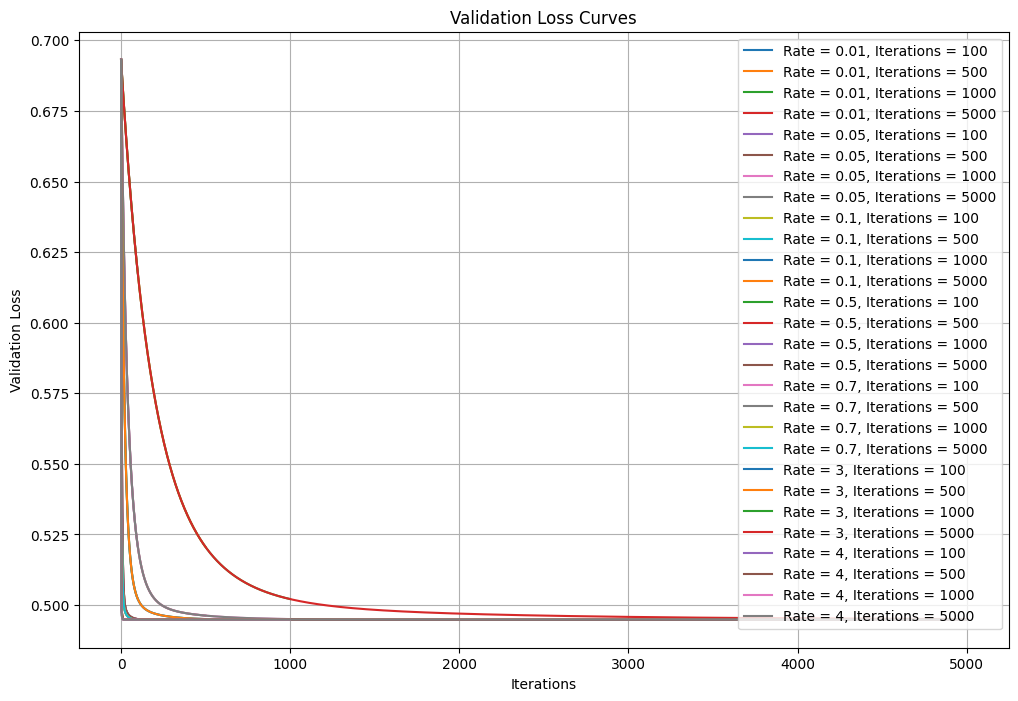

In [5]:
# here i selected 7 steps and 4 amounts of iterations
steps = [0.01, 0.05, 0.1, 0.5, 0.7, 3, 4]
iterations = [100, 500, 1000, 5000]

validation_losses = []
w_init = np.zeros((X_train.shape[1], 1)) #initialized w again as an initial value, because we want it to reset on every run

for rate in steps:
    for iters in iterations:
        w = np.copy(w_init)
        b = 0
        _, validation_costs = algorithm(X_train, y_train, X_val, y_val, w, b, rate, iters) # we don't take training loss as question asks to only calculate the validation loss
        validation_losses.append((rate, iters, validation_costs)) #appended found values to the array
        print(f"Trained with rate = {rate}, iterations = {iters}, final validation loss = {validation_costs[-1]}")

#plotting part
plt.figure(figsize=(12, 8))
for rate, iters, costs in validation_losses:
    plt.plot(costs, label=f'Rate = {rate}, Iterations = {iters}')

plt.title('Validation Loss Curves')
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Here, i can see the rate of 0.5 on 500 iterations is the best one.

<span style="font-size: 12pt; font-weight: bold;">Q5. Combine the validation and training data and retrain the final model with the chosen hyperparameters.</span>


Final training cost:
0.46259167436911136


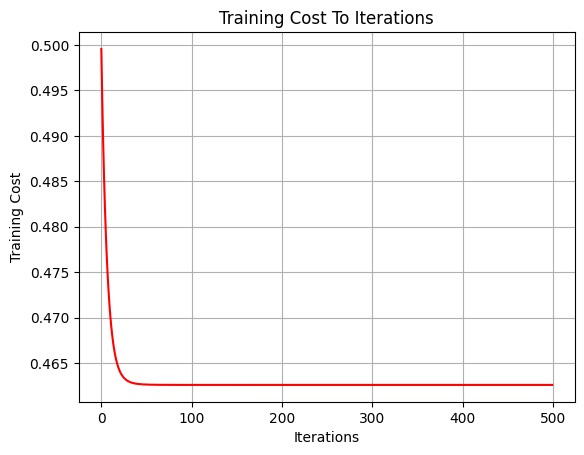

In [6]:
X_train = np.concatenate((X_train, X_val), axis=0) # combined the datasets like we did on the recitations
y_train = np.concatenate((y_train, y_val), axis=0)

training_costs, _ = algorithm(X_train, y_train, X_train, y_train, w, b, 0.5, 500) # again, since we only have the train data now, i am taking the training costs

print("Final training cost:")
print(training_costs[-1])

#plotting:
plt.plot(training_costs,color='red')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Training Cost')
plt.title('Training Cost To Iterations')
plt.show()

<span style="font-size: 12pt; font-weight: bold;">Q6. Evaluate the accuracy of your model on the testing data and report the results.</span>


In [7]:
Z_test = np.dot(X_test, w) + b # the input to the sigmoid function
A_test = sigmoid(Z_test) 
y_pred_test = (A_test > 0.5).astype(int)  # converts the probabilities

correct_predictions = np.mean(y_pred_test == y_test)  
test_accuracy = correct_predictions * 100  

print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 82.68%


This is the end of the homework 3.